In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


"\nX = np.load('Input_data_ML.npy')\nY = np.load('Output_data_ML.npy')\n"

In [18]:
X = np.load('/content/drive/My Drive/Quantum Research/QML Scattering/Input_data_ML.npy')
#Y = np.load('/content/drive/My Drive/Quantum Research/QML Scattering/Classical ML Scattering/Output_data_ML.npy')
Y = np.load('/content/drive/My Drive/Quantum Research/QML Scattering/Output_data_ML_new.npy')

'''
X = np.load('Input_data_ML.npy')
Y = np.load('Output_data_ML.npy')
'''

X=X.astype(np.float64)
Y=Y.astype(np.float64)

print(np.shape(X),np.shape(Y))
X.dtype, Y.dtype

(1070107, 38) (1070107, 15)


(dtype('float64'), dtype('float64'))

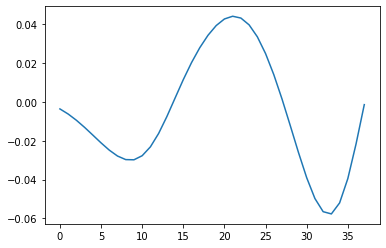

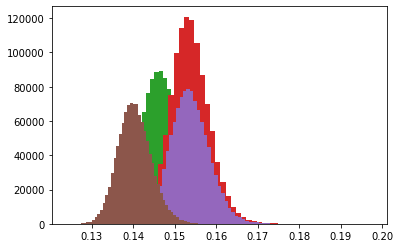

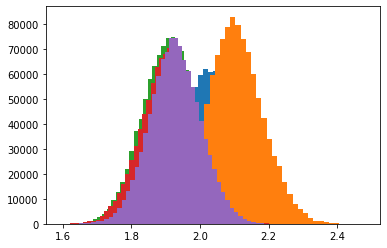

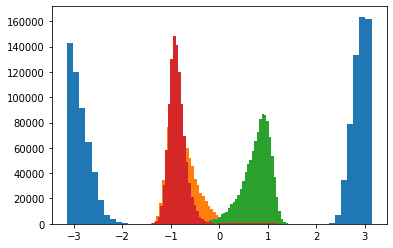

In [19]:
plt.plot(X[10000,:])
plt.show()
for i in range(6):
    plt.hist(Y[:,i],bins=50)
plt.show()
for i in range(6,11):
    plt.hist(Y[:,i],bins=50)
plt.show()
for i in range(11,15):
    plt.hist(Y[:,i],bins=50)
plt.show()

In [20]:
#scaler2 =StandardScaler()
#X=scaler2.fit_transform(X)

In [21]:
Y[:,6:]=Y[:,6:]%(2*np.pi)

y_mean=np.mean(Y,axis=0)
y_std=np.std(Y,axis=0)
Y=(Y-y_mean)/y_std

#Y=np.log(Y)

R=np.array([i for i in range(Y.shape[0])])
np.random.shuffle(R)
X=X[R,:]
Y=Y[R,:]  

Q1=np.quantile(Y,0.10,axis=0)
Q3=np.quantile(Y,0.90,axis=0)
IQR=Q3-Q1
X=X[~((Y < (Q1 - 1.5 * IQR)) |(Y > (Q3 + 1.5 * IQR))).any(axis=1)]
Y=Y[~((Y < (Q1 - 1.5 * IQR)) |(Y > (Q3 + 1.5 * IQR))).any(axis=1)]

'''
#Re-Normalization is the worst idea. 
print(np.mean(Y,axis=0),np.std(Y,axis=0))
y_mean=np.mean(Y,axis=0)
y_std=np.std(Y,axis=0)
Y=(Y-y_mean)/y_std
'''
print(np.mean(Y,axis=0),np.std(Y,axis=0))

[ 0.00185421 -0.0011231  -0.00557265 -0.0025413   0.00083065 -0.00088865
 -0.02519635  0.01477237 -0.02005449 -0.02218668 -0.00711686  0.00925702
  0.15577102 -0.14125756  0.10888785] [1.00175749 1.00047772 0.99441738 0.99021984 0.99800293 0.9978466
 0.9931639  0.98470665 0.99251398 0.99288471 0.99477991 1.00084311
 0.29176436 0.29879601 0.27264212]


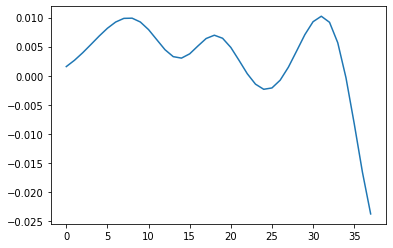

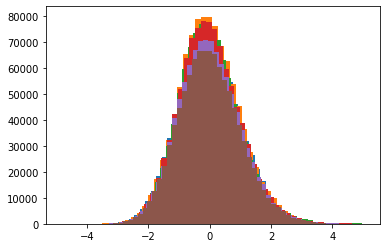

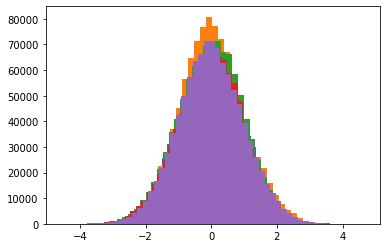

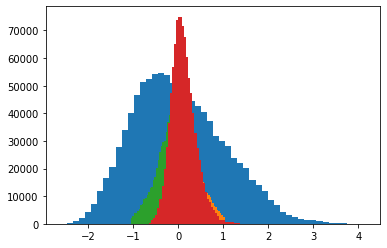

In [22]:
plt.plot(X[10000,:])
plt.show()
for i in range(6):
    plt.hist(Y[:,i],bins=50)
plt.show()
for i in range(6,11):
    plt.hist(Y[:,i],bins=50)
plt.show()
for i in range(11,15):
    plt.hist(Y[:,i],bins=50)
plt.show()

In [23]:
Cov=np.transpose(X)@X

In [24]:
eig,W=np.linalg.eig(Cov)
np.shape(W)

(38, 38)

Text(0, 0.5, 'Principal Components')

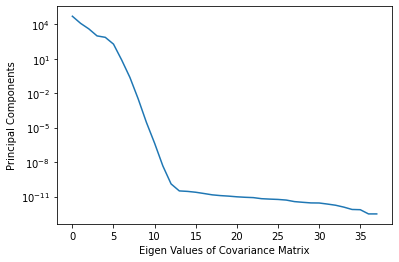

In [35]:
plt.semilogy(np.flip(np.sort(np.abs(eig))))
plt.xlabel('Eigen Values of Covariance Matrix')
plt.ylabel('Principal Components')

In [38]:
y=np.abs(X@np.transpose(W[:2,:]))
np.shape(y)

(1023612, 2)

In [40]:
key=np.random.randint(np.shape(y)[0], size=1000)
y=y[key,:]
Y=Y[key,:]

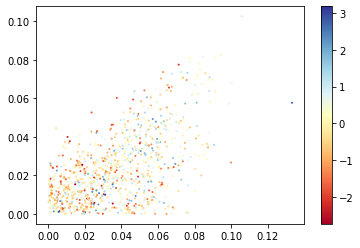

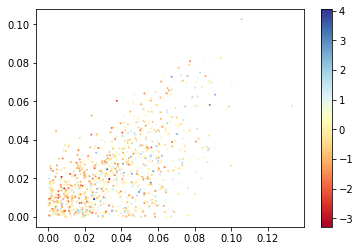

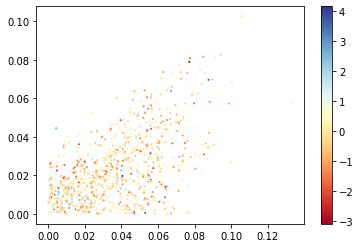

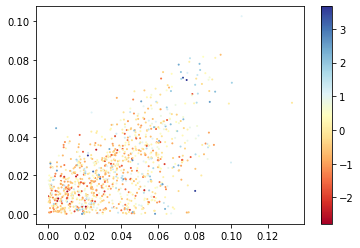

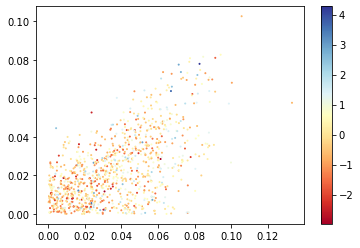

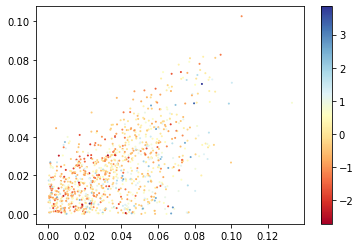

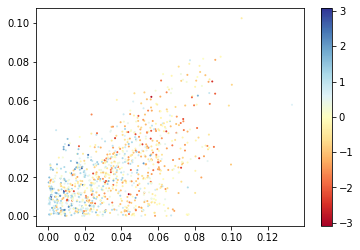

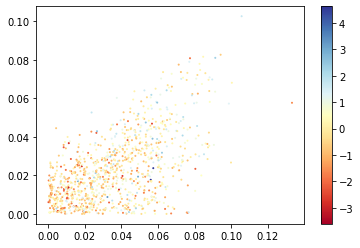

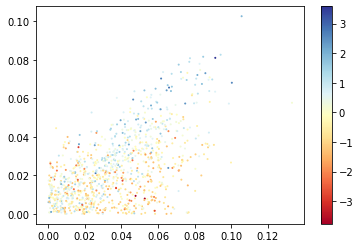

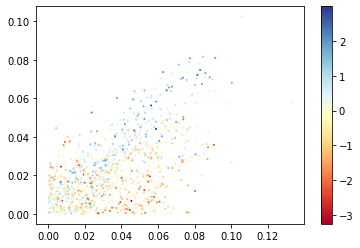

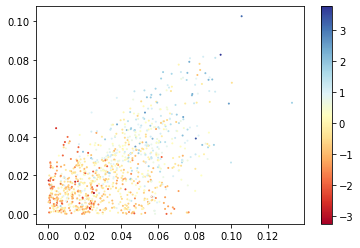

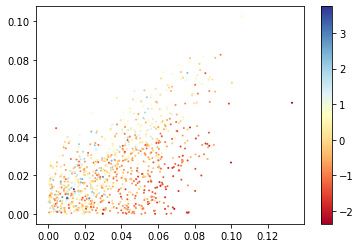

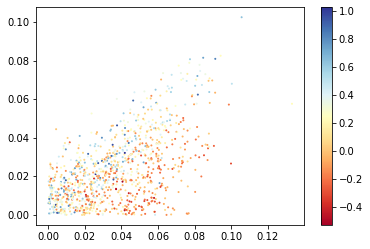

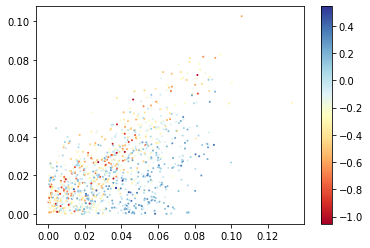

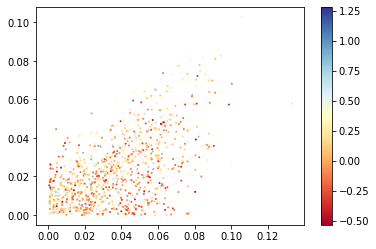

In [41]:
for i in range(15):
    cm = plt.cm.get_cmap('RdYlBu')
    sc = plt.scatter(y[:,0], y[:,1], c=Y[:,i], s=1, cmap=cm)
    plt.colorbar(sc)
    plt.show()